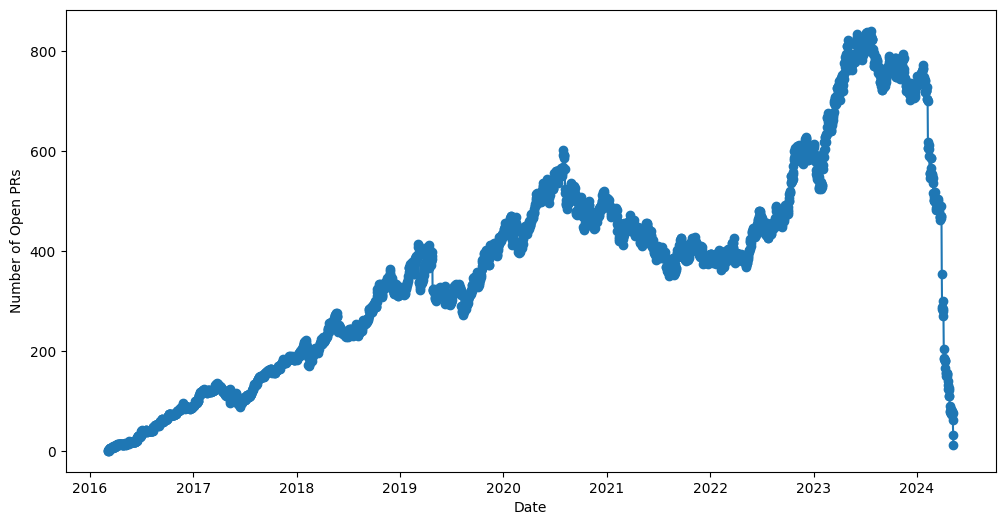

In [3]:
!pip install pandas
!pip install matplotlib
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("project-8400-GitHub-20240509T181710.csv")

df['created_at'] = pd.to_datetime(df['created_at'])
df['closed_at'] = pd.to_datetime(df['closed_at'])

date_range = pd.date_range(
    start=df['created_at'].min(), end=df['closed_at'].max())

open_prs = pd.DataFrame(date_range, columns=['date'])
open_prs['open_count'] = 0

for _, row in df.iterrows():
    open_prs.loc[(open_prs['date'] >= row['created_at']) & (
        open_prs['date'] <= row['closed_at']), 'open_count'] += 1

plt.figure(figsize=(12, 6))
plt.plot(open_prs['date'], open_prs['open_count'], marker='o')
plt.xlabel('Date')
plt.ylabel('Number of Open PRs')
plt.show()